In [1]:
import numpy as np
import cv2
from scipy.ndimage import imread

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15,10]

In [3]:
files = !ls ./bills_17/original/

In [4]:
originals = [cv2.imread('./bills_17/original/{}'.format(f)) for f in files]
masks = [cv2.imread('./bills_17/processed/{}'.format(f),0) for f in files]
coords = [np.loadtxt('./bills_17/coordinates/{}'.format(f)) for f in files]

In [5]:
coords[0]

array([[ 0.33541667,  0.8046875 ],
       [ 0.325     ,  0.25      ],
       [ 0.64166667,  0.796875  ],
       [ 0.63958333,  0.246875  ]])

In [6]:
range(len(coords))

range(0, 17)

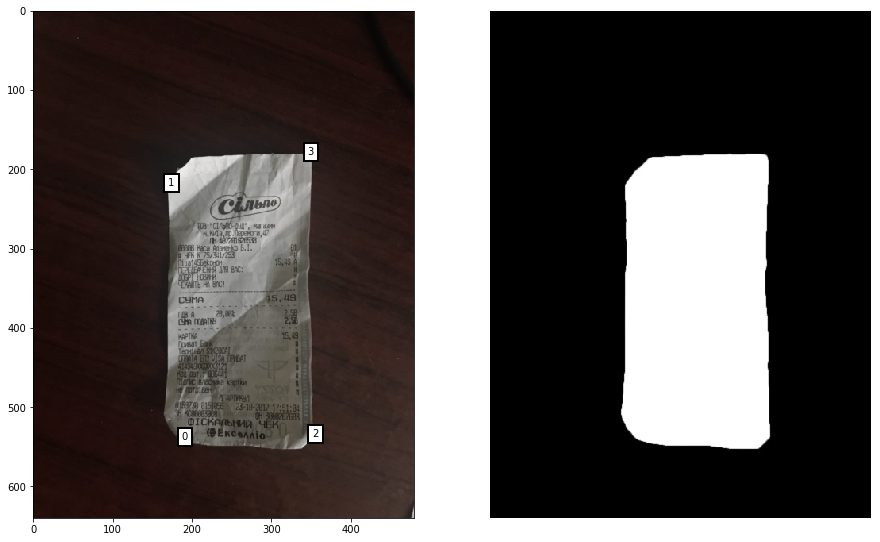

In [7]:
i = 3

f,ax = plt.subplots(1,2)
ax[0].imshow(originals[i][:,:,::-1])
ax[1].imshow(masks[i],cmap='gray')
plt.axis('off')
# ax[0].scatter(coords[i][:,0]*480,coords[i][:,1]*640)

bbox_props = dict(boxstyle="square,pad=0.4", fc="white", lw=2)

for j, coord in enumerate(coords[i]):
    ax[0].text(coord[0]*480,coord[1]*640,str(j),bbox=bbox_props)

In [ ]:
def co_order(x):
    return (x[0]>0.5)*2+(x[1]<0.5)

In [ ]:
coords = [np.r_[sorted(coord_i,key=co_order)] for coord_i in coords]

In [ ]:
co_order(coords[1][1])

In [ ]:
coords[5]

In [ ]:
boxes = []
for i in range(len(masks)):
    _,thresh = cv2.threshold(masks[i],127,255,0)
    cnt = cv2.findContours(thresh, 1, 2)[1][0]
    epsilon = 0.05*cv2.arcLength(cnt,True)
    box = cv2.approxPolyDP(cnt,epsilon,True)[:,0,:]
    assert (box.shape[0] == 4), "Not all points"
    boxes.append(box.copy())

In [ ]:
np.r_[boxes[5]] / (480,640)

In [ ]:
coords = [np.r_[sorted(coord_i,key=co_order)]/ (480,640) for coord_i in boxes]

In [ ]:
for i in range(len(files)):
    np.savetxt('./bills_17/coordinates/{}'.format(files[i]),np.r_[coords[i]])